In [51]:
# Import modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn import metrics

import pmdarima as pm

import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from datetime import datetime,timedelta
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
%matplotlib inline

In [52]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
df = pd.read_csv('/content/drive/MyDrive/CSE_438 Project/Dataset/Dataset3.csv')

In [55]:
df.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,1/2/2015,4240.25,4272.75,4201.00,4214.25,4214.25,229555.0
1,1/5/2015,4216.00,4220.75,4145.00,4161.75,4161.75,313771.0
2,1/6/2015,4166.50,4172.50,4082.00,4102.25,4102.25,426154.0
3,1/7/2015,4105.50,4163.25,4102.75,4151.50,4151.50,328184.0
4,1/8/2015,4152.25,4242.75,4152.25,4232.25,4232.25,272056.0


In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [57]:
el_df = df.set_index('Date')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdad35e160>,
      dtype=object)

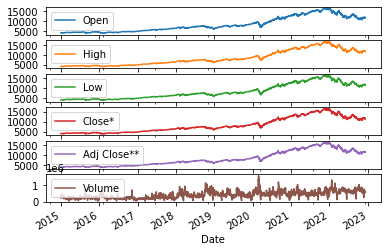

In [58]:
el_df.plot(subplots=True)

In [59]:
el_df.resample('M').mean()

,Open,High,Low,Close*,Adj Close**,Volume
Date,,,,,,
2015-01-31,4183.312500,4221.237500,4136.800000,4176.787500,4176.787500,341627.850000
2015-02-28,4323.513158,4351.631579,4305.381579,4339.157895,4339.157895,209627.263158
2015-03-31,4389.521739,4410.684783,4356.945652,4383.478261,4383.478261,212127.521739
2015-04-30,4413.238095,4441.857143,4386.702381,4421.321429,4421.321429,213783.428571
2015-05-31,4474.537500,4500.862500,4446.575000,4476.587500,4476.587500,194860.550000
...,...,...,...,...,...,...
2022-08-31,13104.739130,13231.065217,12940.326087,13078.847826,13078.847826,617278.391304
2022-09-30,11937.601190,12076.261905,11727.220238,11861.855000,11861.855000,700716.809524
2022-10-31,11240.590909,11436.750000,11055.806818,11265.568182,11265.568182,756209.272727


In [127]:
el_df.isnull().sum()

Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efdacfed550>,
      dtype=object)

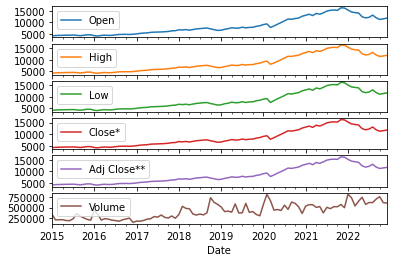

In [60]:
el_df.resample('M').mean().plot(subplots=True)

In [61]:
final_df=el_df.resample('M').mean()

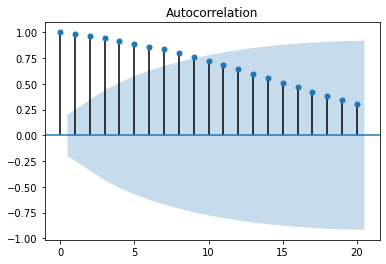

In [62]:
acf = plot_acf(final_df["Open"].dropna())

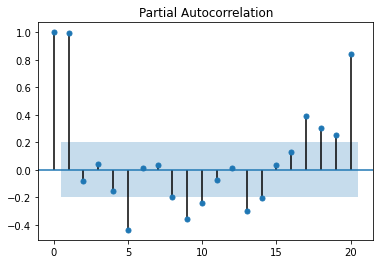

In [63]:
pacf = plot_pacf(final_df["Open"].dropna())

In [64]:
model = pm.auto_arima(final_df['Open'], 
                        m=12, seasonal=True,
                      start_p=0, start_q=0, max_order=4, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(1,0,1)[12]             : AIC=1467.229, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=1468.875, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=1453.713, Time=0.14 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=1424.949, Time=0.18 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=1424.895, Time=0.09 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=1424.728, Time=0.19 sec
 ARIMA(0,2,1)(2,0,0)[12]             : AIC=1426.641, Time=0.44 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=1426.680, Time=0.26 sec
 ARIMA(0,2,1)(2,0,1)[12]             : AIC=inf, Time=1.28 sec
 ARIMA(0,2,0)(1,0,0)[12]             : AIC=1465.244, Time=0.08 sec
 ARIMA(1,2,1)(1,0,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,2,2)(1,0,0)[12]             : AIC=inf, Time=0.28 sec
 ARIMA(1,2,2)(1,0,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(0,2,1)(1,0,0)[12] intercept   : AIC=1426.413, Time=0.29 sec

Best model:  ARIMA(0,2,1)(1,0,0)[12]  

In [238]:
train=final_df[(final_df.index.get_level_values(0) >= '2015-02-1') & (final_df.index.get_level_values(0) <= '2022-08-30')]

In [239]:
test=final_df[(final_df.index.get_level_values(0) > '2022-9-1')]

In [240]:
model.fit(train['Open'])

ARIMA(order=(0, 2, 1), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [241]:
forecast1=model.predict(n_periods=8, return_conf_int=True)
forecast_range=pd.date_range(start='2022-8-1', periods=8,freq='M')

In [242]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

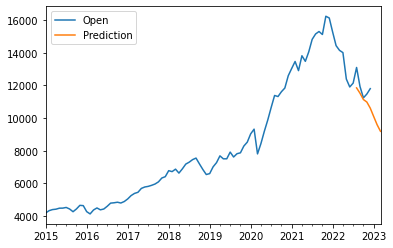

In [243]:
pd.concat([final_df['Open'],forecast1_df],axis=1).plot()


In [248]:
pred=[]
for val in final_df['Open']:
  pred.append(val)
for i in range(len(pred)):
  pred[i]=int(pred[i])

pred = pred[::-1]
pred = pred[0:8]
testValues=[]
print(pred)

for val in forecast1_df['Prediction']:  
  testValues.append(int(val))

print(testValues)


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

print('MSE: ',np.sqrt(mean_squared_error(testValues,pred)))
print("Mean Absolute Error: ",mean_absolute_error(testValues,pred))
print("R2 Score: ",r2_score(testValues,pred))
print("MAPE Percentage Error: ",mean_absolute_percentage_error(testValues,pred))

[11805, 11474, 11240, 11937, 13104, 12146, 11908, 12394]
[11852, 11525, 11137, 10985, 10612, 10100, 9595, 9189]
MSE:  1835.0714223157638
Mean Absolute Error:  1401.125
R2 Score:  -3.4119935853069245
MAPE Percentage Error:  0.14144440265771013
